# Body wave anisotropy and the Christoffel matrix

## 1. Setup

**We start with the definition of the elastic parameters.** A **radially anisotropic medium** can be described by the Love parameters $A$, $C$, $F$, $L$ and $N$. Their relation to the components $c_{ijkl}$ of the elastic tensor is $c_{1111}=c_{2222}=A$, $c_{3333}=C$, $c_{2323}=c_{1313}=L$, $c_{1212}=N$, $c_{1133}=c_{2233}=c_{3311}=c_{3322}$ and $c_{2211}=c{1122}=A-2N$. All other $c_{ijkl}$ are zero. For an **isotropic medium** we have $F=A-2L$.

In our notation we largely follow the book by *Seismic Anisotropy in the Earth* Babuska & Cara (1991). The Voigt notation and sorting of the elastic tensor is given on page 9, specific elastic tensors for various minerals are listed in chapter 3.

In [161]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as plt3d

# Some predefined elastic tensors. Options are 'general', 'olivine', 'mica'. Others may be added.
type='olivine'

# This defines the elastic parameters in a readable form.

# Some general elastic tensor, for experimentation.
if type=='general':

    rho=1.0
    
    A=5.0
    F=4.0  
    C=7.0
    L=2.5
    N=1.5

    c1111=A;          c1122=A-2*N;      c1133=F;      c1123=0.0;    c1113=0.0;    c1112=0.0;
    c2211=A-2*N;      c2222=A;          c2233=F;      c2223=0.0;    c2213=0.0;    c2212=0.0;
    c3311=F;          c3322=F;          c3333=C;      c3323=0.0;    c3313=0.0;    c3312=0.0;
    c2311=0.0;        c2322=0.0;        c2333=0.0;    c2323=L;      c2313=0.0;    c2312=0.0;
    c1311=0.0;        c1322=0.0;        c1333=0.0;    c1323=0.0;    c1313=L;      c1312=0.0;
    c1211=0.0;        c1222=0.0;        c1233=0.0;    c1223=0.0;    c1213=0.0;    c1212=N;

# Elastic tensor and density for mica (muscovite, monoclinic, quasi-hexagonal). All SI units.
elif type=='mica':
    
    rho=2790.0

    c1111=178.0e9;    c1122=42.4e9;     c1133=14.5e9;   c1123=0.0;     c1113=0.0;    c1112=0.0;
    c2211=42.4e9;     c2222=178.0e9;    c2233=14.5e9;   c2223=0.0;     c2213=0.0;    c2212=0.0;
    c3311=14.5e9;     c3322=14.5e9;     c3333=54.9e9;   c3323=0.0;     c3313=0.0;    c3312=0.0;
    c2311=0.0;        c2322=0.0;        c2333=0.0;      c2323=12.2e9;  c2313=0.0;    c2312=0.0;
    c1311=0.0;        c1322=0.0;        c1333=0.0;      c1323=0.0;     c1313=12.2e9; c1312=0.0;
    c1211=0.0;        c1222=0.0;        c1233=0.0;      c1223=0.0;     c1213=0.0;    c1212=67.8e9;
    
elif type=='olivine':
    
    rho=3311.0

    c1111=323.7e9;    c1122=66.4e9;     c1133=71.6e9;   c1123=0.0;     c1113=0.0;    c1112=0.0;
    c2211=66.4e9;     c2222=197.6e9;    c2233=75.6e9;   c2223=0.0;     c2213=0.0;    c2212=0.0;
    c3311=71.6e9;     c3322=75.6e9;     c3333=235.1e9;  c3323=0.0;     c3313=0.0;    c3312=0.0;
    c2311=0.0;        c2322=0.0;        c2333=0.0;      c2323=64.6e9;  c2313=0.0;    c2312=0.0;
    c1311=0.0;        c1322=0.0;        c1333=0.0;      c1323=0.0;     c1313=78.7e9; c1312=0.0;
    c1211=0.0;        c1222=0.0;        c1233=0.0;      c1223=0.0;     c1213=0.0;    c1212=79.0e9;

# 2. Transcription of the tensor components into a $3\times 3 \times 3 \times 3$ matrix.

We write the elastic tensor components defined above into a Python matrix.

In [162]:
c=np.zeros((3,3,3,3))

# c11kl
c[0,0,0,0]=c1111; c[0,0,0,1]=c1112; c[0,0,0,2]=c1113; 
c[0,0,1,0]=c1112; c[0,0,1,1]=c1122; c[0,0,1,2]=c1123; 
c[0,0,2,0]=c1113; c[0,0,2,1]=c1123; c[0,0,2,2]=c1133;

# c12kl
c[0,1,0,0]=c1211; c[0,1,0,1]=c1212; c[0,1,0,2]=c1213; 
c[0,1,1,0]=c1212; c[0,1,1,1]=c1222; c[0,1,1,2]=c1223; 
c[0,1,2,0]=c1213; c[0,1,2,1]=c1223; c[0,1,2,2]=c1233;

# c13kl
c[0,2,0,0]=c1311; c[0,2,0,1]=c1312; c[0,2,0,2]=c1313; 
c[0,2,1,0]=c1312; c[0,2,1,1]=c1322; c[0,2,1,2]=c1323; 
c[0,2,2,0]=c1313; c[0,2,2,1]=c1323; c[0,2,2,2]=c1333;

# c21kl
c[1,0,0,0]=c1211; c[1,0,0,1]=c1212; c[1,0,0,2]=c1213; 
c[1,0,1,0]=c1212; c[1,0,1,1]=c1222; c[1,0,1,2]=c1223; 
c[1,0,2,0]=c1213; c[1,0,2,1]=c1223; c[1,0,2,2]=c1233;

# c22kl
c[1,1,0,0]=c2211; c[1,1,0,1]=c2212; c[1,1,0,2]=c2213; 
c[1,1,1,0]=c2212; c[1,1,1,1]=c2222; c[1,1,1,2]=c2223; 
c[1,1,2,0]=c2213; c[1,1,2,1]=c2223; c[1,1,2,2]=c2233;

# c23kl
c[1,2,0,0]=c2311; c[1,2,0,1]=c2312; c[1,2,0,2]=c2313; 
c[1,2,1,0]=c2312; c[1,2,1,1]=c2322; c[1,2,1,2]=c2323; 
c[1,2,2,0]=c2313; c[1,2,2,1]=c2323; c[1,2,2,2]=c2333;

# c31kl
c[2,0,0,0]=c1311; c[2,0,0,1]=c1312; c[2,0,0,2]=c1313; 
c[2,0,1,0]=c1312; c[2,0,1,1]=c1322; c[2,0,1,2]=c1323; 
c[2,0,2,0]=c1313; c[2,0,2,1]=c1323; c[2,0,2,2]=c1333;

# c32kl
c[2,1,0,0]=c2311; c[2,1,0,1]=c2312; c[2,1,0,2]=c2313; 
c[2,1,1,0]=c2312; c[2,1,1,1]=c2322; c[2,1,1,2]=c2323; 
c[2,1,2,0]=c2313; c[2,1,2,1]=c2323; c[2,1,2,2]=c2333;

# c33kl
c[2,2,0,0]=c3311; c[2,2,0,1]=c3312; c[2,2,0,2]=c3313; 
c[2,2,1,0]=c3312; c[2,2,1,1]=c3322; c[2,2,1,2]=c3323; 
c[2,2,2,0]=c3313; c[2,2,2,1]=c3323; c[2,2,2,2]=c3333;

## 3. Christoffel matrix computation

In the next step, we define a range of unit position vectors that cover the full sphere. Each of these position vectors will serve as a propagation direction for which we compute the Christoffel matrix. Also for each direction we then solve the eigenvalue problem, which gives the phase velocity and the polarisation direction.

In [167]:
# Colatitude and longitude angles
theta=np.arange(0.0,np.pi+np.pi/20.0,np.pi/20.0)
phi=np.arange(0.0,2.0*np.pi+np.pi/20.0,np.pi/20.0)

# Coordinate axes and velocity values
x=np.zeros((len(theta),len(phi)))
y=np.zeros((len(theta),len(phi)))
z=np.zeros((len(theta),len(phi)))

v_max=np.zeros((len(theta),len(phi)))
v_int=np.zeros((len(theta),len(phi)))
v_min=np.zeros((len(theta),len(phi)))

# March through all angles and compute Christoffel matrix
for i in range(len(theta)):
    for j in range(len(phi)):
        
        n1=np.cos(phi[j])*np.sin(theta[i])
        n2=np.sin(phi[j])*np.sin(theta[i])
        n3=np.cos(theta[i])

        x[i,j]=n1
        y[i,j]=n2
        z[i,j]=n3
        
        m=np.ones((3,3))

        m[0,0]=c[0,0,0,0]*n1*n1+c[0,0,1,0]*n1*n2+c[0,0,2,0]*n1*n3+c[0,1,0,0]*n2*n1+c[0,1,1,0]*n2*n2+c[0,1,2,0]*n2*n3+c[0,2,0,0]*n3*n1+c[0,2,1,0]*n3*n2+c[0,2,2,0]*n3*n3
        m[1,1]=c[1,0,0,1]*n1*n1+c[1,0,1,1]*n1*n2+c[1,0,2,1]*n1*n3+c[1,1,0,1]*n2*n1+c[1,1,1,1]*n2*n2+c[1,1,2,1]*n2*n3+c[1,2,0,1]*n3*n1+c[1,2,1,1]*n3*n2+c[1,2,2,1]*n3*n3
        m[2,2]=c[2,0,0,2]*n1*n1+c[2,0,1,2]*n1*n2+c[2,0,2,2]*n1*n3+c[2,1,0,2]*n2*n1+c[2,1,1,2]*n2*n2+c[2,1,2,2]*n2*n3+c[2,2,0,2]*n3*n1+c[2,2,1,2]*n3*n2+c[2,2,2,2]*n3*n3
        m[0,2]=c[0,0,0,2]*n1*n1+c[0,0,1,2]*n1*n2+c[0,0,2,2]*n1*n3+c[0,1,0,2]*n2*n1+c[0,1,1,2]*n2*n2+c[0,1,2,2]*n2*n3+c[0,2,0,2]*n3*n1+c[0,2,1,2]*n3*n2+c[0,2,2,2]*n3*n3
        m[0,1]=c[0,0,0,1]*n1*n1+c[0,0,1,1]*n1*n2+c[0,0,2,1]*n1*n3+c[0,1,0,1]*n2*n1+c[0,1,1,1]*n2*n2+c[0,1,2,1]*n2*n3+c[0,2,0,1]*n3*n1+c[0,2,1,1]*n3*n2+c[0,2,2,1]*n3*n3
        m[1,2]=c[1,0,0,2]*n1*n1+c[1,0,1,2]*n1*n2+c[1,0,2,2]*n1*n3+c[1,1,0,2]*n2*n1+c[1,1,1,2]*n2*n2+c[1,1,2,2]*n2*n3+c[1,2,0,2]*n3*n1+c[1,2,1,2]*n3*n2+c[0,2,2,2]*n3*n3
        
        m[2,0]=m[0,2]
        m[1,0]=m[0,1]
        m[2,1]=m[1,2]
        
        m=m/rho

        [velocity_squared,polarisation]=np.linalg.eig(m)
        v=np.sqrt(np.sort(velocity_squared))

        v_max[i,j]=v[2]
        v_int[i,j]=v[1]
        v_min[i,j]=v[0]

## 4. Print and plot results

Finally, we print some velocity values and plot the phase velocities. For each direction we plot the different between the maximum velocity (over all angles) and the velocity for that direction.

qP: min. velocity = 7725.274 m/s, max. velocity = 9887.620 m/s, anisotropy = 21.869 % 

qS1: min. velocity = 4875.372 m/s, max. velocity = 5514.969 m/s, anisotropy = 11.597 % 

qS2: min. velocity = 4417.094 m/s, max. velocity = 4875.372 m/s, anisotropy = 9.400 % 



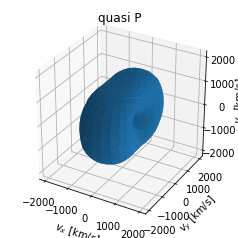

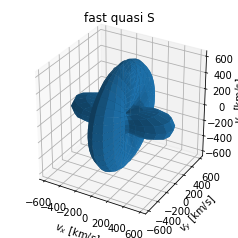

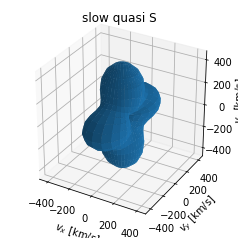

In [178]:
print("qP: min. velocity = %1.3f m/s, max. velocity = %1.3f m/s, anisotropy = %2.3f %% \n" % (np.min(v_max),np.max(v_max),100.0-100.0*np.min(v_max)/np.max(v_max)))
print("qS1: min. velocity = %1.3f m/s, max. velocity = %1.3f m/s, anisotropy = %2.3f %% \n" % (np.min(v_int),np.max(v_int),100.0-100.0*np.min(v_int)/np.max(v_int)))
print("qS2: min. velocity = %1.3f m/s, max. velocity = %1.3f m/s, anisotropy = %2.3f %% \n" % (np.min(v_min),np.max(v_min),100.0-100.0*np.min(v_min)/np.max(v_min)))


# Maximum velocity (quasi P)
v=(np.max(v_max)-v_max)
scale=np.max(v)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(v*x,v*y,v*z)
ax.set_xlim([-scale,scale])
ax.set_ylim([-scale,scale])
ax.set_zlim([-scale,scale])
ax.set_xlabel('$v_x$ [km/s]')
ax.set_ylabel('$v_y$ [km/s]')
ax.set_zlabel('$v_z$ [km/s]')
ax.set_aspect('equal')
ax.set_title('quasi P')
plt.show()

# Intermediate velocity (fast quasi S)
v=(np.max(v_int)-v_int)
scale=np.max(v)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(v*x,v*y,v*z)
ax.set_xlim([-scale,scale])
ax.set_ylim([-scale,scale])
ax.set_zlim([-scale,scale])
ax.set_xlabel('$v_x$ [km/s]')
ax.set_ylabel('$v_y$ [km/s]')
ax.set_zlabel('$v_z$ [km/s]')
ax.set_aspect('equal')
ax.set_title('fast quasi S')
plt.show()

# Slow velocity (slow quasi S)
v=(np.max(v_min)-v_min)
scale=np.max(v)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(v*x,v*y,v*z)
ax.set_xlim([-scale,scale])
ax.set_ylim([-scale,scale])
ax.set_zlim([-scale,scale])
ax.set_xlabel('$v_x$ [km/s]')
ax.set_ylabel('$v_y$ [km/s]')
ax.set_zlabel('$v_z$ [km/s]')
ax.set_aspect('equal')
ax.set_title('slow quasi S')
plt.show()
